## **Data Science Assignment**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
historical_df = pd.read_csv('/content/drive/MyDrive/ds_yokesh_VP/historical_data.csv')
historical_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
sentiment_df = pd.read_csv('/content/drive/MyDrive/ds_yokesh_VP/fear_greed_index.csv')
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [10]:
historical_df.info()
print('='*60)
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [16]:
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'],format='%d-%m-%Y %H:%M')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [19]:
historical_df[['Timestamp IST']].head()
historical_df['Timestamp IST'].isna().sum()

np.int64(0)

In [20]:
historical_df['Date'] = historical_df['Timestamp IST'].dt.date
sentiment_df['Date'] = sentiment_df['date'].dt.date

In [21]:
historical_df['Date'].head()

,Date
0,2024-12-02
1,2024-12-02
2,2024-12-02
3,2024-12-02
4,2024-12-02


In [22]:
sentiment_df['Date'].head()

,Date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05


In [23]:
historical_clean = historical_df[
    ['Account', 'Coin', 'Execution Price', 'Size USD',
     'Side', 'Closed PnL', 'Fee', 'Date']
].copy()


In [25]:
sentiment_clean = sentiment_df[
    ['Date', 'classification']
].copy()

In [29]:
historical_clean.rename(columns={
    'Execution Price': 'Execution_price',
    'Size USD': 'Trade_Size_USD',
    'Closed PnL': 'Closed_pnl'
}, inplace=True)

sentiment_clean.rename(columns={
    'classification': 'Market_Sentiment'
}, inplace=True)

In [31]:
historical_clean.head()

,Account,Coin,Execution_price,Trade_Size_USD,Side,Closed_pnl,Fee,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,0.0,0.345404,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,0.0,0.005600,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,0.0,0.050431,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,0.0,0.050043,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,0.0,0.003055,2024-12-02


In [32]:
sentiment_clean.head()

,Date,Market_Sentiment
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [33]:
merged_df = pd.merge(historical_clean, sentiment_clean, on='Date', how='inner')

In [34]:
merged_df.head()

,Account,Coin,Execution_price,Trade_Size_USD,Side,Closed_pnl,Fee,Date,Market_Sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,0.0,0.345404,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,0.0,0.005600,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,0.0,0.050431,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,0.0,0.050043,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,0.0,0.003055,2024-12-02,Extreme Greed


In [35]:
merged_df['Market_Sentiment'].value_counts()

,count
Market_Sentiment,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [40]:
profit_status = merged_df.groupby('Market_Sentiment')['Closed_pnl'].mean()
profit_status

,Closed_pnl
Market_Sentiment,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


In [41]:
median_profit = merged_df.groupby('Market_Sentiment')['Closed_pnl'].median()
median_profit

,Closed_pnl
Market_Sentiment,
Extreme Fear,0.0
Extreme Greed,0.0
Fear,0.0
Greed,0.0
Neutral,0.0


In [42]:
volume_stats = merged_df.groupby('Market_Sentiment')['Trade_Size_USD'].mean()
volume_stats

,Trade_Size_USD
Market_Sentiment,
Extreme Fear,5349.731843
Extreme Greed,3112.251565
Fear,7816.109931
Greed,5736.884375
Neutral,4782.732661


In [43]:
trade_count = merged_df['Market_Sentiment'].value_counts()
trade_count

,count
Market_Sentiment,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [44]:
fee_stats = merged_df.groupby('Market_Sentiment')['Fee'].mean()
fee_stats

,Fee
Market_Sentiment,
Extreme Fear,1.116291
Extreme Greed,0.675902
Fear,1.495172
Greed,1.254372
Neutral,1.044798


In [45]:
side_stats = pd.crosstab(merged_df['Market_Sentiment'], merged_df['Side'])
side_stats

Side,BUY,SELL
Market_Sentiment,,
Extreme Fear,10935,10465
Extreme Greed,17940,22052
Fear,30270,31567
Greed,24576,25727
Neutral,18969,18717


In [47]:
summary_df = pd.DataFrame({
    'Avg_Profit': profit_status,
    'Median_Profit': median_profit,
    'Avg_Trade_Size': volume_stats,
    'Avg_Fee': fee_stats,
    'Trade_Count': trade_count
})

summary_df

,Avg_Profit,Median_Profit,Avg_Trade_Size,Avg_Fee,Trade_Count
Market_Sentiment,,,,,
Extreme Fear,34.537862,0.0,5349.731843,1.116291,21400
Extreme Greed,67.892861,0.0,3112.251565,0.675902,39992
Fear,54.290400,0.0,7816.109931,1.495172,61837
Greed,42.743559,0.0,5736.884375,1.254372,50303
Neutral,34.307718,0.0,4782.732661,1.044798,37686


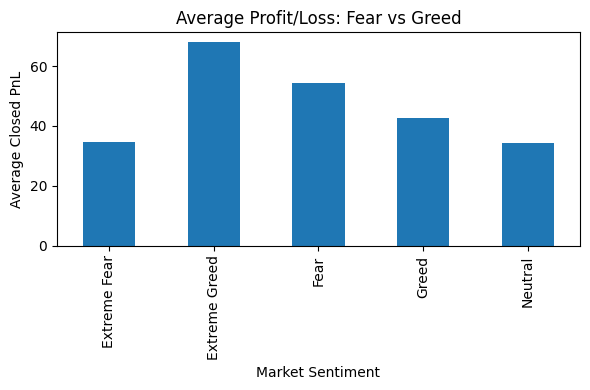

In [49]:
profit_status.plot(kind='bar', figsize=(6,4))
plt.title('Average Profit/Loss: Fear vs Greed')
plt.ylabel('Average Closed PnL')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_yokesh_VP/outputs/avg_profit_fear_vs_greed.png')
plt.show()

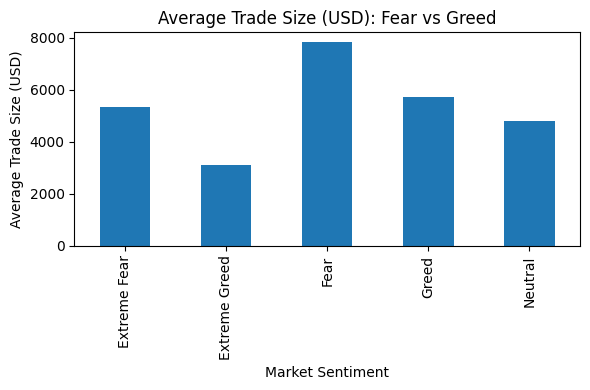

In [50]:
volume_stats.plot(kind='bar', figsize=(6,4))
plt.title('Average Trade Size (USD): Fear vs Greed')
plt.ylabel('Average Trade Size (USD)')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_yokesh_VP/outputs/avg_trade_size_fear_vs_greed.png')
plt.show()

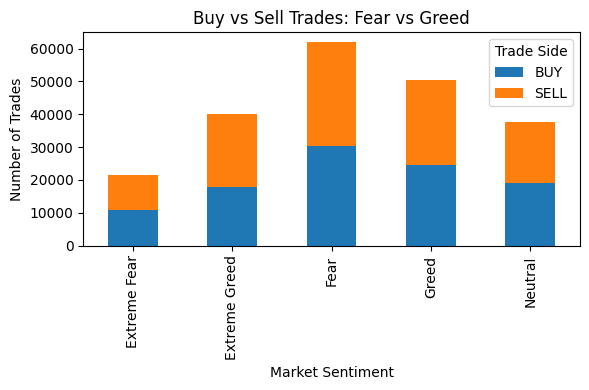

In [52]:
side_stats.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title('Buy vs Sell Trades: Fear vs Greed')
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.legend(title='Trade Side')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_yokesh_VP/outputs/buy_sell_fear_vs_greed.png')
plt.show()

<Figure size 600x400 with 0 Axes>

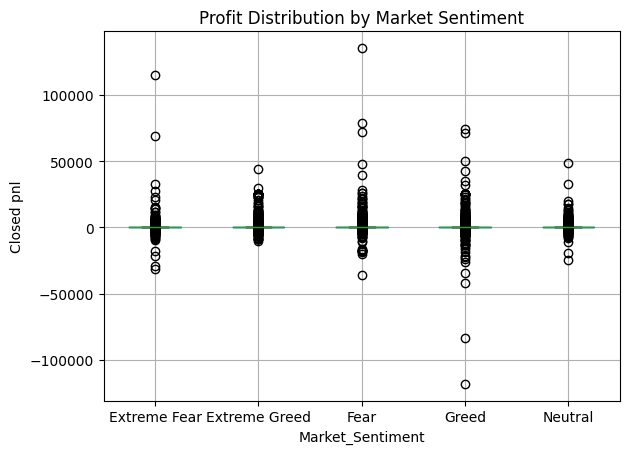

In [54]:
plt.figure(figsize=(6,4))
merged_df.boxplot(column='Closed_pnl', by='Market_Sentiment')
plt.title('Profit Distribution by Market Sentiment')
plt.suptitle('')
plt.ylabel('Closed pnl')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_yokesh_VP/outputs/profit_distribution_fear_vs_greed.png')
plt.show()

In [55]:
merged_df.to_csv('/content/drive/MyDrive/ds_yokesh_VP/csv_files/processed_trading_sentiment_data.csv',index=False)